# Visualizing Boundary-Core Decomposition of Graphs 
## By Moses Boudourides & Mitali Kessinger

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import random
import math
import numpy as np
import itertools as it
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
from IPython.core.display import Image, display

In [2]:
def weight_attr(G,maxw):
    # G is a graph
    # maxw is a positive integer (maximum weight value)
    weight={}
    for edge in G.edges():
        ed=edge[0]
        de=edge[1]
        G[ed][de]['weight']=random.randrange(1,maxw)
        weight[(ed,de)]=G[ed][de]['weight']
    return weight

In [3]:
def b_c(G,S):
    B=[]
    C=[]
    GS=G.subgraph(S)
    for n in GS.nodes():
        if len([m for m in list(G.neighbors(n)) if m not in GS.nodes()])>0:
            B.append(n) 
        else:
            C.append(n)
    return sorted(B), sorted(C)

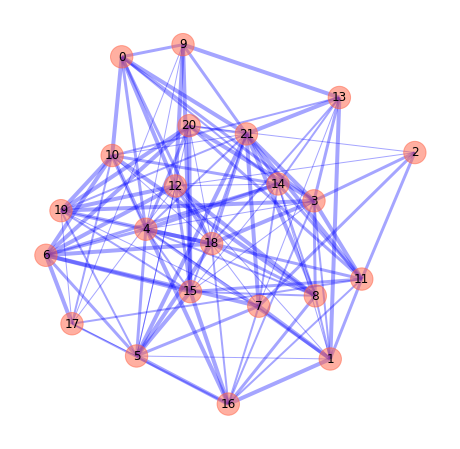

In [4]:
name = "Erdos-Renyi random"

while True:
    G = nx.erdos_renyi_graph(n=22, p=0.5) #, directed=True)
    if len(list(nx.isolates(G)))<1:
        break
        
# while True:
#     G = nx.erdos_renyi_graph(n=30, p=0.1) #, directed=True)
#     if nx.is_directed(G):
#         if nx.is_weakly_connected(G):
#             break
#     else:
#         if nx.is_connected(G): 
#             break

maxw=5 #random.randint(3,11) #(5,16)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

sizes=[500 for n in G.nodes()]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));

nodes = nx.draw_networkx_nodes(G, pos,node_size=sizes, node_color="tomato", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.35)
nx.draw_networkx_labels(G, pos)

nodes = nx.draw_networkx_nodes(G, pos,node_size=sizes, node_color="tomato", alpha=0.3)

plt.axis('off');

In [5]:
size=20
nodes=list(G.nodes())

while True:
    random.shuffle(nodes)
    S=sorted(random.sample(nodes, size))
    if len(b_c(G,S)[1])>2:
        break
        
b,c=b_c(G,S)
print("S boundary",b)
print("S core",c)
sorted(b+c)==sorted(G.subgraph(S).nodes())

S boundary [1, 3, 4, 6, 7, 10, 12, 15, 16, 17, 18, 20, 21]
S core [0, 2, 8, 9, 11, 13, 14]


True

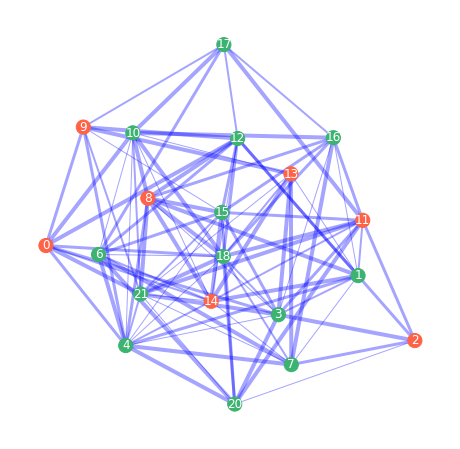

In [6]:
GS=G.subgraph(S)

part={}
for n in GS.nodes():
    if n in b:
        part[n]="boundary node"
else:
    part[n]="core node"
    
plt.figure(figsize=(8,8));

sizes=[200 for n in GS.nodes()]
pos=graphviz_layout(GS)

for n in GS.nodes():
    GS.nodes[n]['color'] = 'mediumseagreen' if n in b else 'tomato'
colors = [node[1]['color'] for node in GS.nodes(data=True)]

nodes = nx.draw_networkx_nodes(GS, pos,node_size=sizes, node_color=colors)
nx.draw_networkx_edges(GS, pos,arrowsize=20, width=edge_width, edge_color="blue", alpha=0.35)
nx.draw_networkx_labels(GS, pos, font_color='white')
plt.axis('off');

In [7]:
def two_cycles(G,b,c,compr):
    Gb=G.subgraph(b)
    Gc=G.subgraph(c)
    posb=nx.circular_layout(Gb)
    posc=nx.circular_layout(Gc)
    for n in Gc:
        posc[n]=[compr*posc[n][0],compr*posc[n][1]]
    posbc={}
    for n in G.nodes():
        if n in b:
            posbc[n]=posb[n]
        else:
            posbc[n]=posc[n]
    return posbc

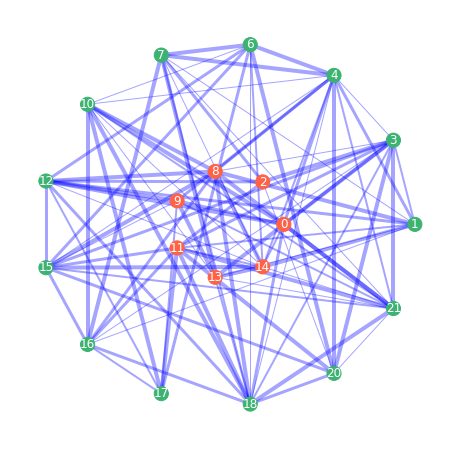

In [8]:
compr=0.3
pos=two_cycles(GS,b,c,compr)

for n in GS.nodes():
    GS.nodes[n]['color'] = 'mediumseagreen' if n in b else 'tomato'
colors = [node[1]['color'] for node in GS.nodes(data=True)]
sizes=[200 for n in GS.nodes()]

plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(GS, pos,node_size=sizes, node_color=colors)
nx.draw_networkx_edges(GS, pos,arrowsize=20, width=edge_width, edge_color="blue", alpha=0.35)
nx.draw_networkx_labels(GS, pos, font_color='white')
plt.axis('off');